This program is under GNU GENERAL PUBLIC LICENSE Version 2, June 1991. See https://www.gnu.org/licenses/old-licenses/gpl-2.0.ja.html for the detail.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
nx, ny = 32, 32 
dx, dy = 0.5e-6, 0.5e-6
eee = 1.0e+6
gamma = 1.0 
delta = 4.*dx 
amobi = 4.e-14
ram = 0.1 
bbb = 2.*np.log((1.+(1.-2.*ram))/(1.-(1.-2.*ram)))/2. 

In [3]:
aaa   = np.sqrt(3.*delta*gamma/bbb) 
www   = 6.*gamma*bbb/delta 
pmobi = amobi*np.sqrt(2.*www)/(6.*aaa) 

In [4]:
dt = 0.1
nsteps = 1000 

In [5]:
p  = np.zeros((nx,ny)) 
dfdp = np.zeros([nx, ny])

In [6]:
r_nuclei = 5.*dx 
for i in range(nx):
    for j in range(ny):
        r = np.sqrt( ((i-nx/2) *dx)**2 +((j-ny/2) * dy)**2 ) - r_nuclei
        p[i,j] = 0.5*(1.-np.tanh(np.sqrt(2.*www)/(2.*aaa)*r))

In [7]:
# 波数ベクトルkとk^2を計算するための関数
def calc_wave_vector(nx, ny, dx, dy):
    half_nx = int(nx/2)
    half_ny = int(ny/2)
    dkx = (2.0 * np.pi) / (nx * dx)
    dky = (2.0 * np.pi) / (ny * dy)
    k2 = np.zeros([nx, ny])
    
    for i in range(nx):
      if i < half_nx:
        kx = i*dkx
      else:
        kx = (i-nx)*dkx
      kx2 = kx**2

      for j in range(ny):
        if j < half_ny:
          ky = j*dky
        else:
          ky = (j-ny)*dky
        ky2 = ky**2

        k2[i,j] = kx2 + ky2       
    return k2

In [8]:
k2 = calc_wave_vector(nx, ny, dx, dy)

nstep =  100


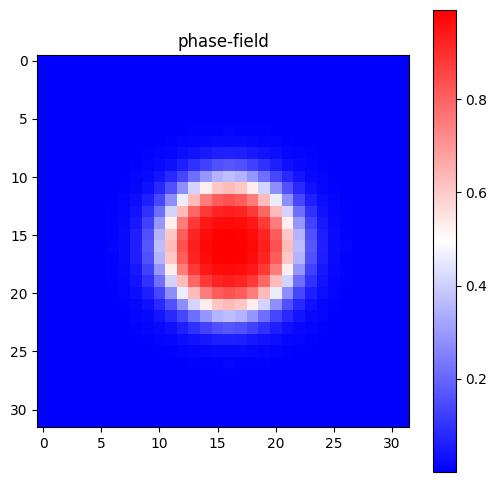

nstep =  200


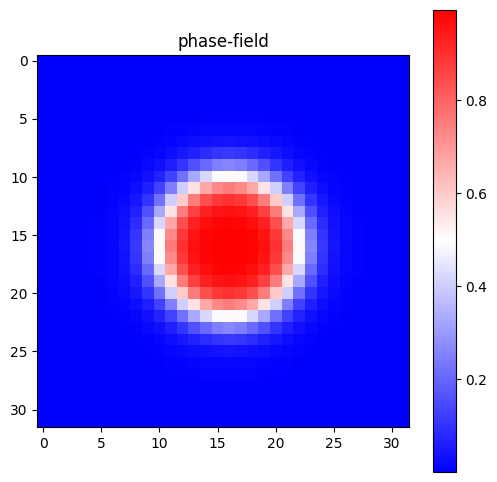

nstep =  300


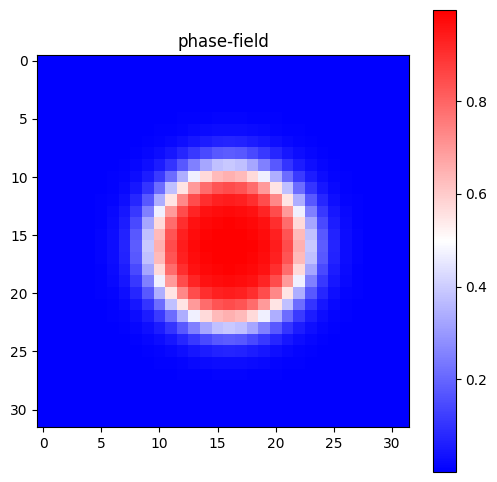

nstep =  400


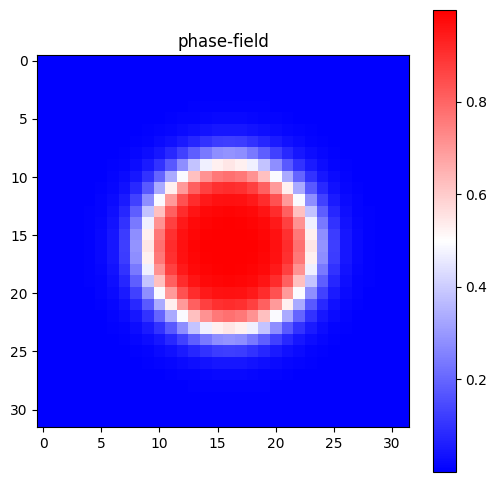

nstep =  500


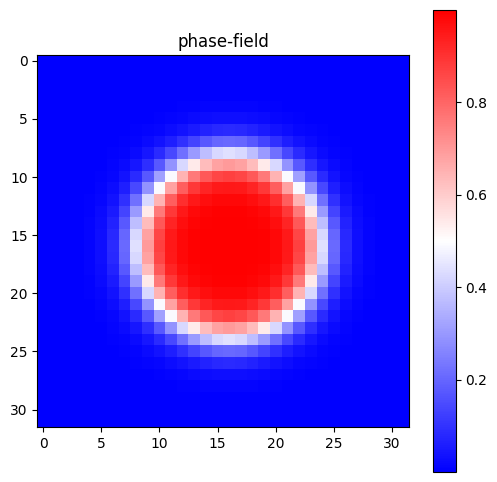

nstep =  600


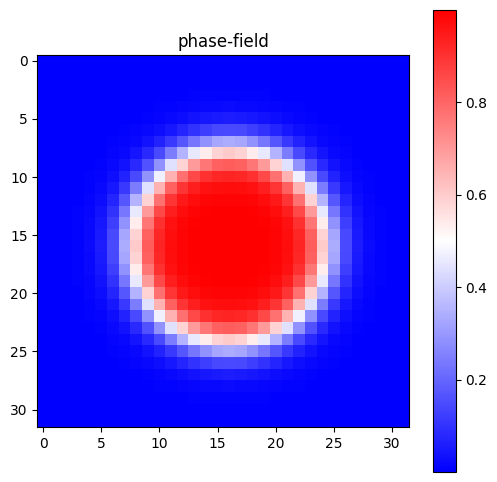

nstep =  700


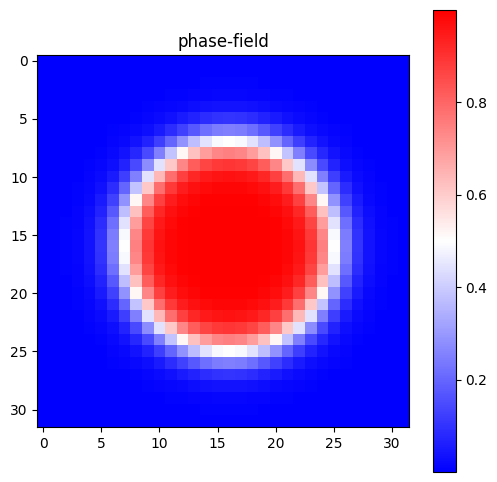

nstep =  800


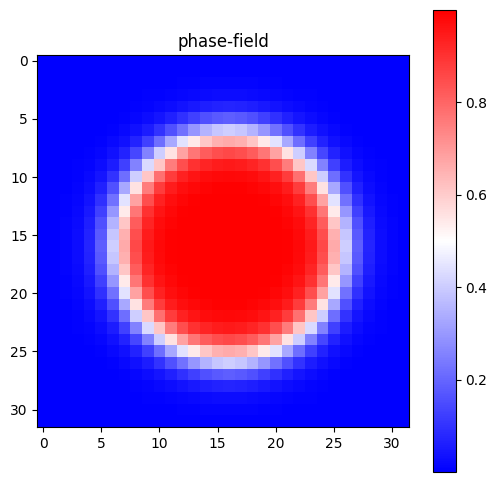

nstep =  900


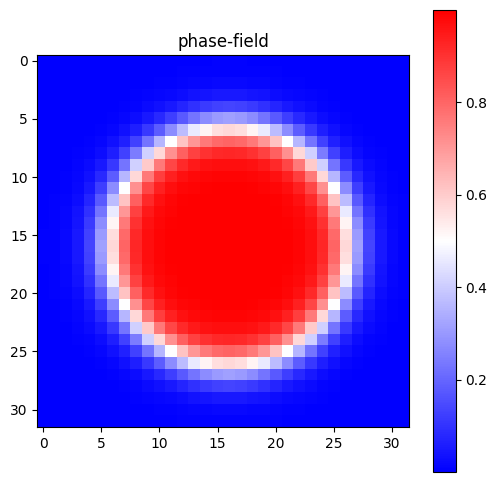

In [9]:
for istep in range(1, nsteps):

  pk = np.fft.fftn(p)
  dfdp[:,:] = 4.0 * www * p[:,:]*(1 - p[:,:])*(p[:,:] - 0.5 + 3.0/2.0/www * eee) 

  dfdpk = np.fft.fftn(dfdp)
 
  nummer = pmobi * dfdpk[:,:] * dt
  denom = 1.0 + pmobi * k2[:,:] * aaa*aaa * dt
  pk[:,:] = (pk[:,:] + nummer) / denom

  p = np.real(np.fft.ifftn(pk))

  for i in range(1, nx):
    for j in range(1, ny):
      if(p[i, j] >= 0.9999):
        p[i, j] = 0.9999
      if(p[i, j] < 0.00001):
        p[i, j] = 0.00001

  if istep % 100 == 0:
      print('nstep = ', istep)
      plt.figure(figsize=(6,6))
      plt.imshow(p, cmap='bwr')        
      plt.title('phase-field')
      plt.colorbar()
      plt.show() 